#Multiple Linear Regression



> What we are going to do? AIM



*   Perform regression analysis to predict the profit of each the 50 startups mentioned in the 
dataset by taking all the input parameters(multi linear regression) 
*   The dataset consists of 5 columns where the ‘state’ column stores the categorical data points, and the rest are numerical features.

 

*   Coverting categorical data points into numeric
*   Use link directly in colab notebook to create a dataframe https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv 
*  Plot visuals by using Matplotlib/Seaborn data visualization comparing the different
features of the input parameters and do Exploratory data analysis (EDA) by using pandas.

#Multi Linear Regression
 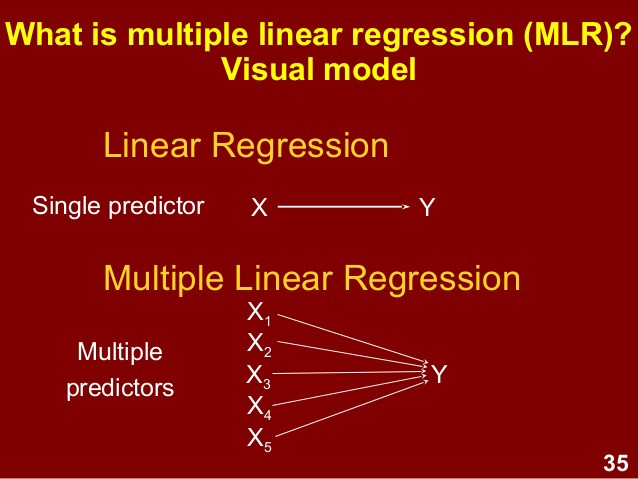
 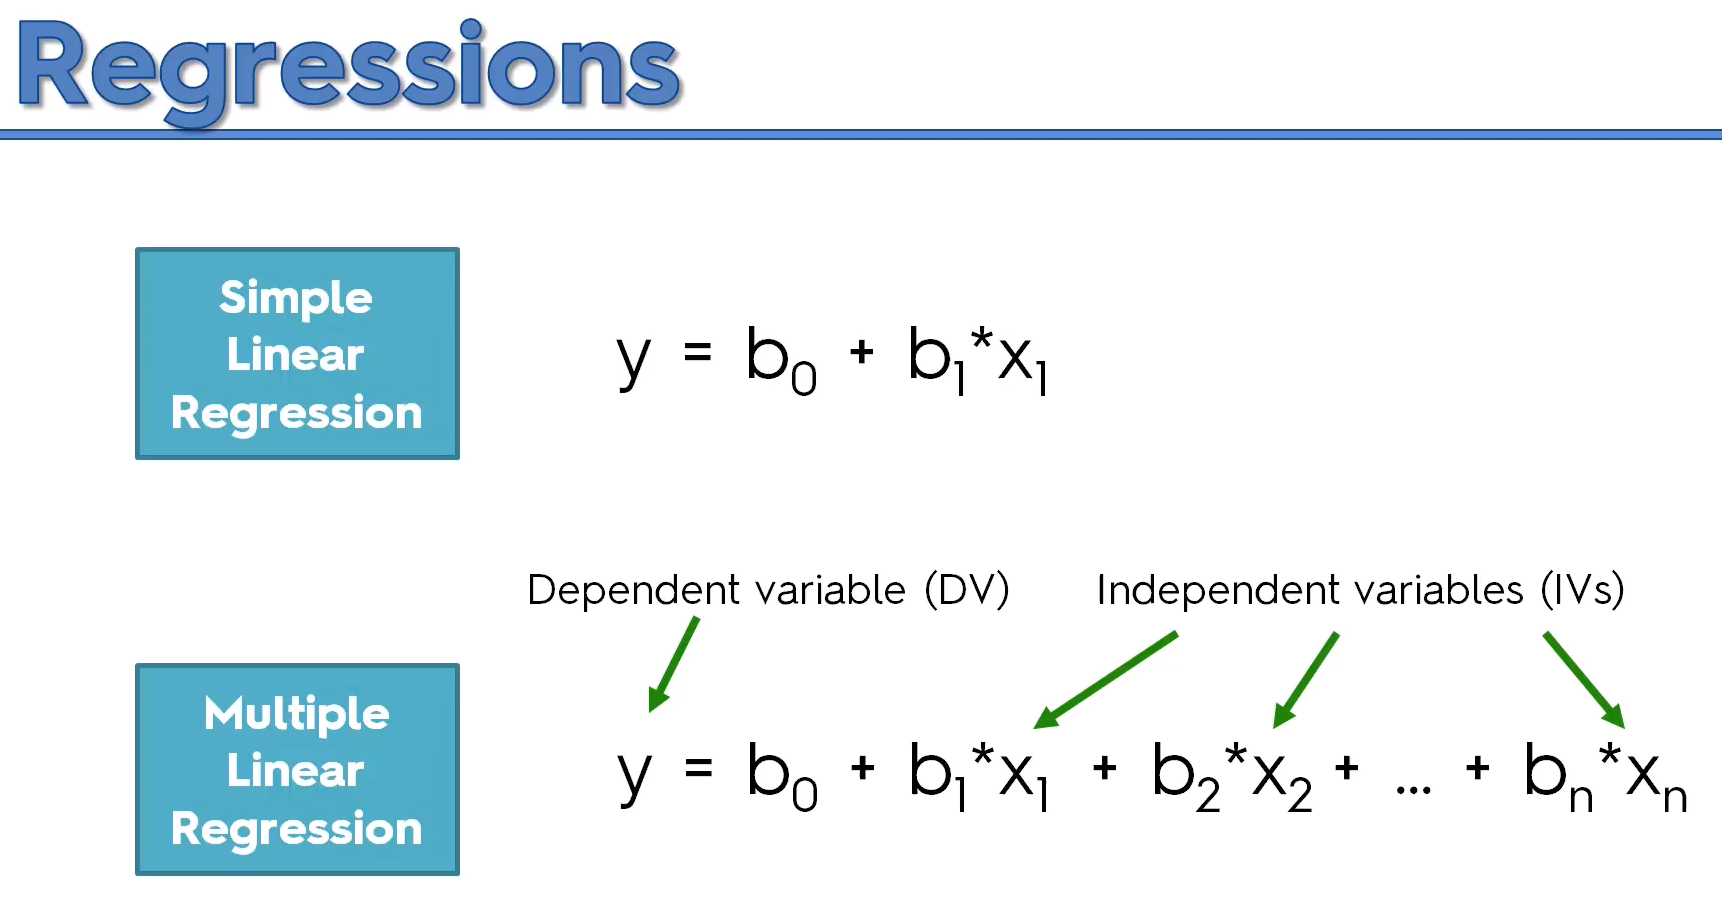

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#we read the csv file
df=pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')

#now we analyze the data

print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The size is {df.size}')

print('The type of each columns are: \n',df.info())







The data has 50 rows and 5 columns
The size is 250
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
The type of each columns are: 
 None


In [ ]:
#we do some EDA
print(df.head())

print('Possible Values for the state are: ',df['State'].unique())

print(f"Highest R&D Spend -> {df['R&D Spend'].max()}")
print(f"Lowest R&D Spend -> {df['R&D Spend'].min()}")
print(f"Average R&D Spend -> {np.mean(df['R&D Spend'])}")
print("-------------------------")
print(f"Highest Profit -> {df['Profit'].max()}")
print(f"Lowest Profit -> {df['Profit'].min()}")
print(f"Average Profit -> {np.mean(df['Profit'])}")

lowerprofit=np.count_nonzero((df['Profit']>0) & (df['Profit']<112012))#112012 got this number from above code ie the avg profit
higherprofit=np.count_nonzero((df['Profit']>=112013) & (df['Profit']<192262))#112012 got this number from above code ie the avg profit
print('No of startups(enteries) that have below average profit: ',lowerprofit)
print('No of startups(enteries) that have above average profit: ',higherprofit)
#taking sum of this two is 50, it's correct.

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Possible Values for the state are:  ['New York' 'California' 'Florida']
Highest R&D Spend -> 165349.2
Lowest R&D Spend -> 0.0
Average R&D Spend -> 73721.61559999999
-------------------------
Highest Profit -> 192261.83
Lowest Profit -> 14681.4
Average Profit -> 112012.63920000002


The count of each state:


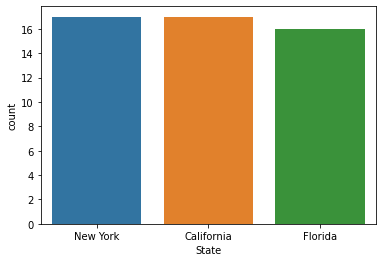

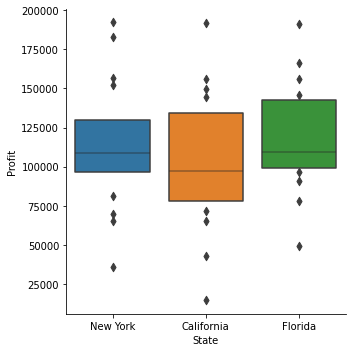

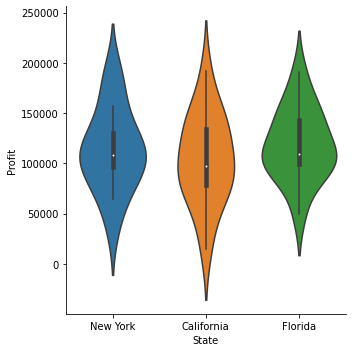

In [ ]:
#now we have some visualization
print('The count of each state:')
sns.countplot(x=df['State'])


sns.catplot(x='State',y='Profit',kind='boxen',data=df)
sns.catplot(x='State',y='Profit',kind='violin',data=df)

In [ ]:
#before computing multiple linear regression
print('Observing the correlation w.r.t Profit:\n')
print(df.corr()['Profit'])
#as you have noticed that it has not taken State column, beacuse this column is not numeric in nature
#its categorical in nature.


Observing the correlation w.r.t Profit:

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64


In [ ]:
#this is how we convert categorical variable into numerical variable
x=df.iloc[:,0:4]

states=pd.get_dummies(x['State'])
 

x=x.drop('State',axis=1)
x=pd.concat([x,states],axis=1)
numeric_startup=pd.concat([x,df['Profit']],axis=1)






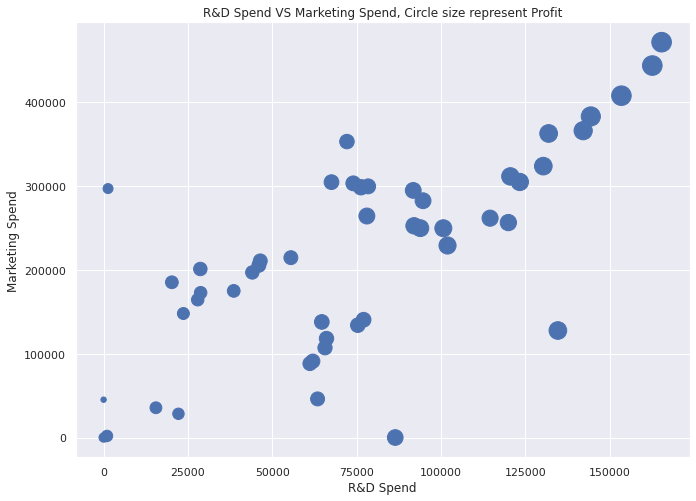

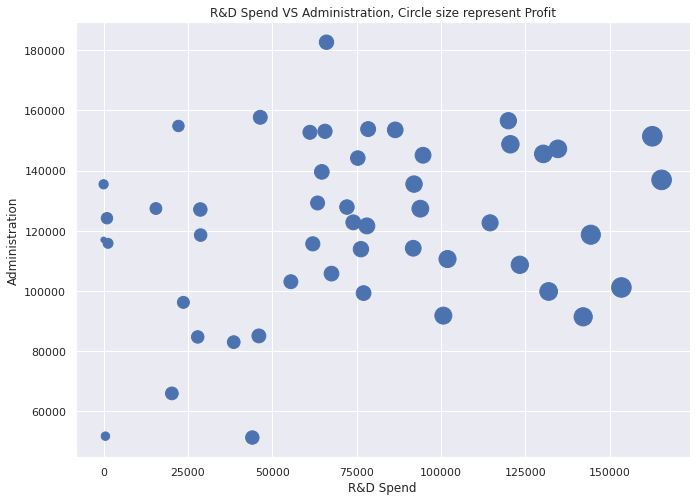

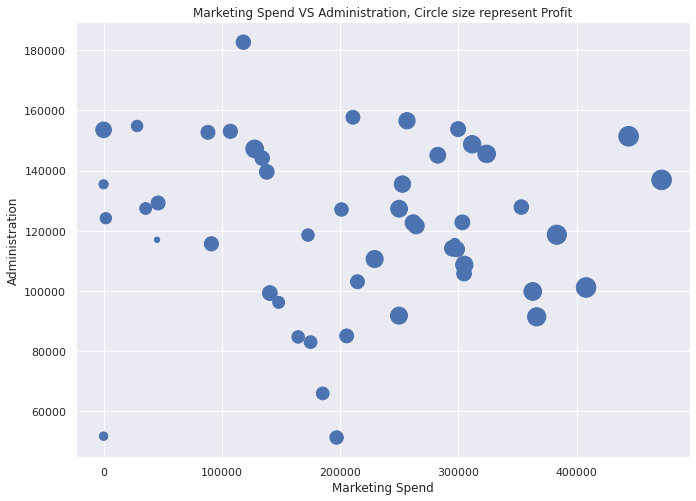

In [ ]:
#now we have graphs on numeirc_startup

plt.xlabel('R&D Spend')
plt.ylabel('Marketing Spend')
plt.title("R&D Spend VS Marketing Spend, Circle size represent Profit")
plt.scatter(numeric_startup['R&D Spend'],numeric_startup['Marketing Spend'] ,s=numeric_startup['Profit']*0.002)
plt.show()


plt.xlabel('R&D Spend')
plt.ylabel('Administration')
plt.title("R&D Spend VS Administration, Circle size represent Profit")
plt.scatter(numeric_startup['R&D Spend'],numeric_startup['Administration'] ,s=numeric_startup['Profit']*0.002)
plt.show()

plt.xlabel('Marketing Spend')
plt.ylabel('Administration')
plt.title("Marketing Spend VS Administration, Circle size represent Profit")
plt.scatter(numeric_startup['Marketing Spend'],numeric_startup['Administration'] ,s=numeric_startup['Profit']*0.002)
plt.show()

In [ ]:
 #after that now we again do correlation

 print(numeric_startup.corr()['Profit'])
print(numeric_startup.info())
 print('As you see that California has negative correlation we drop this numerical column')
 #it also tell us that the startups in california has negative impact on the Profit.
 #beacasue the correlation value for California is -0.145837

 numeric_startup=numeric_startup.drop('California',axis=1)
 print(numeric_startup.info())

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
California        -0.145837
Florida            0.116244
New York           0.031368
Profit             1.000000
Name: Profit, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   California       50 non-null     uint8  
 4   Florida          50 non-null     uint8  
 5   New York         50 non-null     uint8  
 6   Profit           50 non-null     float64
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB
None
As you see that California has negative correlation we drop this numerical column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         

[104440.72582616 132253.81567698 132872.07174272  71707.78771428
 178678.9934985  115078.13124331  66093.9297267   98759.7276409
 114113.5994088  167979.49411476  95786.77295823  87785.3497979
 110455.98228344]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94  96778.92  96479.51 105733.54]


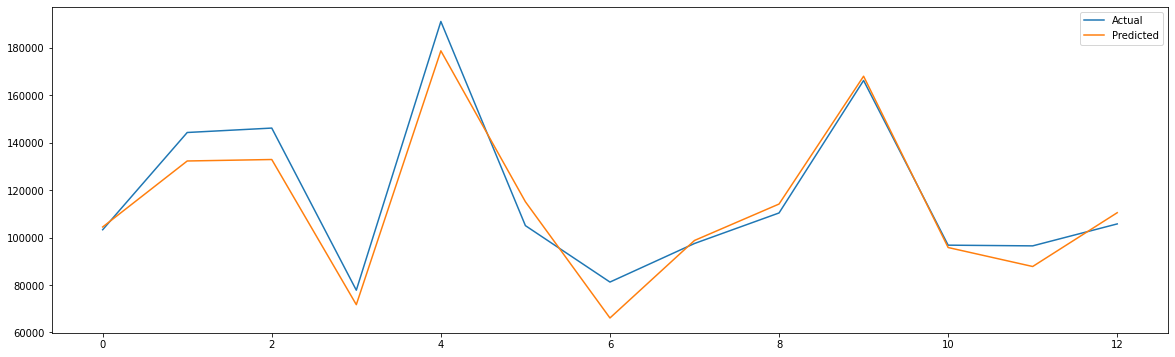

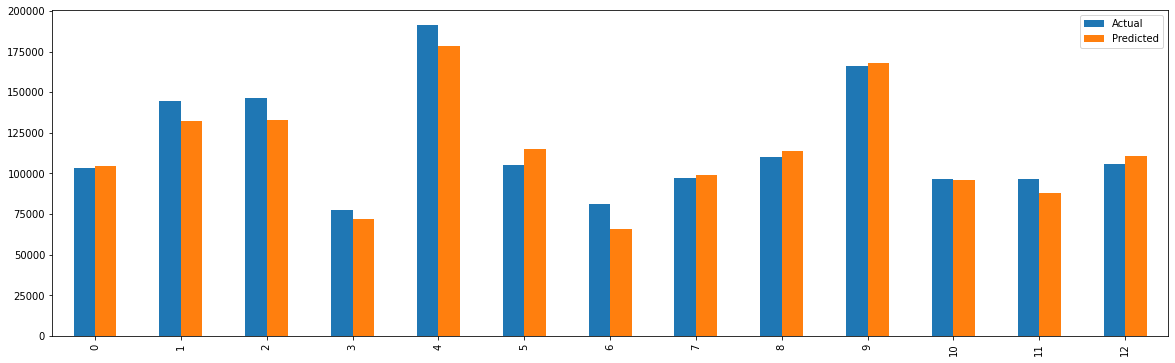

In [ ]:
x=numeric_startup.iloc[:,0:5].values 
y=numeric_startup['Profit'].values
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
# we have splitted the data into training and testting
#after this we need to fit the model,predict,visualize,accuracy

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(y_pred)#predicted ouput

print(y_test)#real actual output
#printing y_pred and y_test is just for comparing the values..

# why there is less difference between ypred and ytest beacuse we have converted catgorical state column 
#into 3 new numerical columns ,one of which was dropped or removed because of its negative correlation value.
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
 

df1.plot(figsize=(20,6))
plt.show()

df1.plot(figsize=(20,6),kind='bar')
plt.show()

r2  score:  0.931581519915206


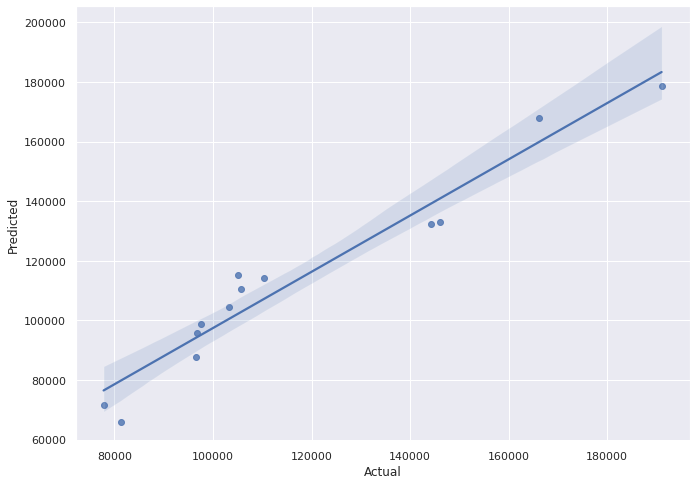

In [ ]:
from sklearn.metrics import r2_score

r2_score=r2_score(y_test,y_pred)
print('r2  score: ',r2_score)
#conclusion The R2 is 0.93, 
#meaning that the observed and the predicted outcome values are highly correlated, which is very good!

#we plot regrssion plot

sns.set(rc={'figure.figsize':(11 ,8)})
sns.regplot(x='Actual',y='Predicted',data=df1)